## Support Vector Machines Project


## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. Create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples.

Can a machine learning model (Support vector machines) help detect low quality (read fraud) wine samples?

Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---

### Import

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("../DATA/wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### Data Exploration

In [38]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

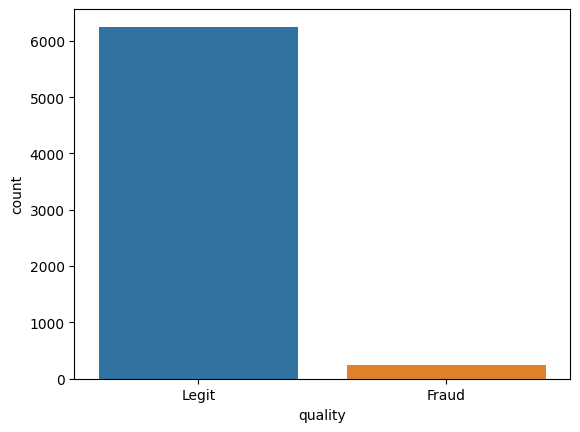

In [39]:
sns.countplot(data=df, x = 'quality');

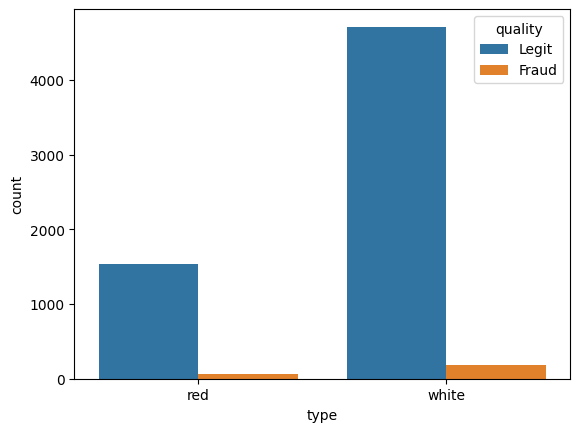

In [40]:
sns.countplot(data=df, x = 'type', hue = 'quality');

In [41]:
total_red = len(df[df['type'] == 'red'])
total_white = len(df[df['type'] == 'white'])

fraud_red = len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')])
fraud_white = len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')])

percent_red_fraud = 100 * fraud_red / total_red
percent_white_fraud = 100 * fraud_white / total_white


In [42]:
percent_red_fraud

3.9399624765478425

In [43]:
percent_white_fraud

3.736218864842793

In [44]:
df['label'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

In [45]:
df.corr(numeric_only=True)['label']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
label                   1.000000
Name: label, dtype: float64

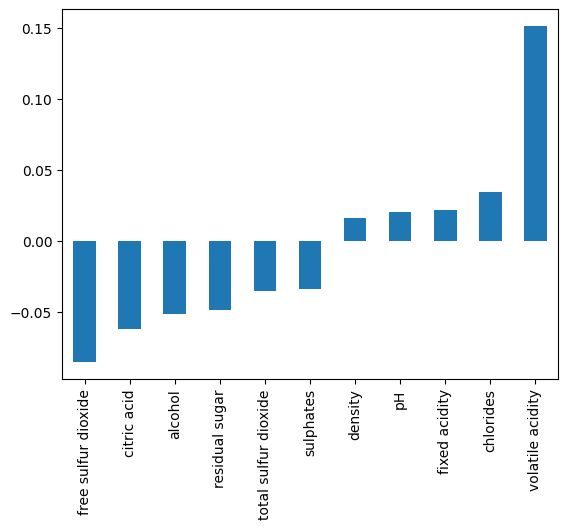

In [46]:
df.corr(numeric_only=True)['label'][:-1].sort_values().plot(kind='bar');

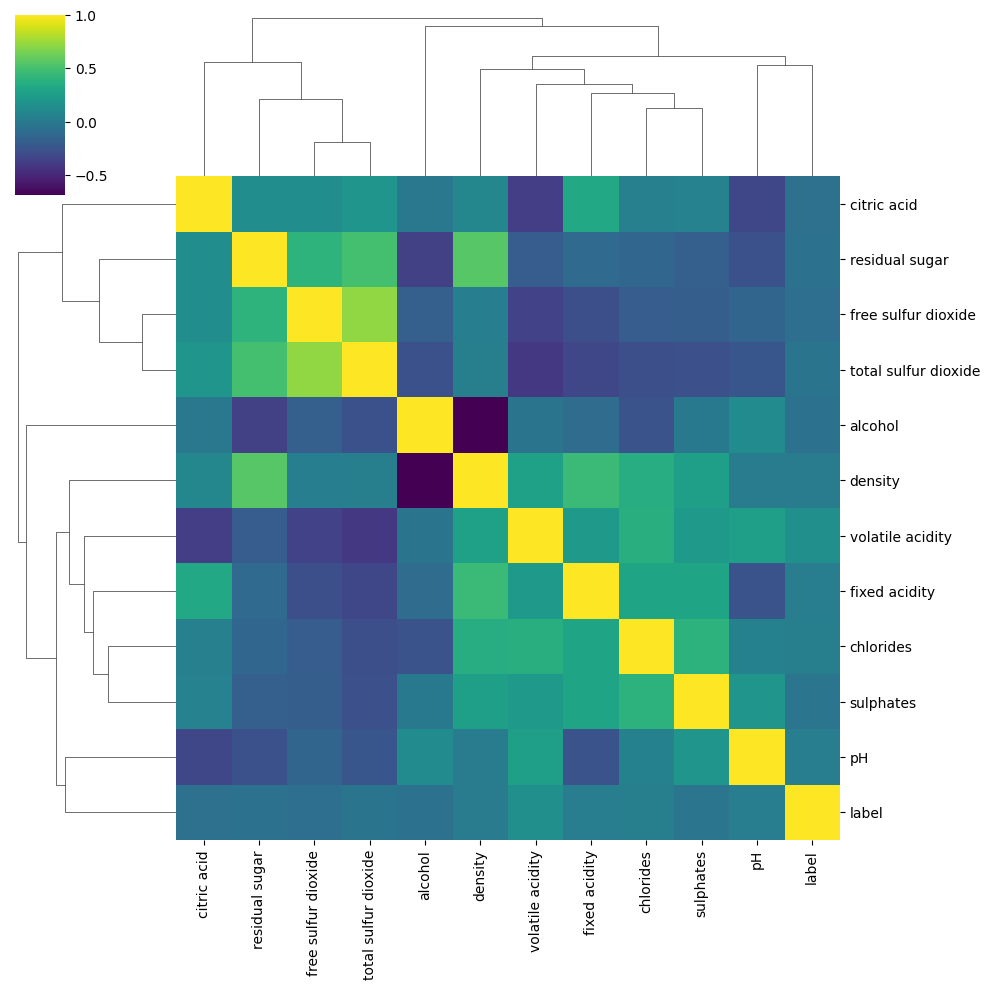

In [47]:
sns.clustermap(df.corr(numeric_only=True), cmap = 'viridis');

----
### Machine Learning Model

#### Support vectors machines

In [48]:
df['type'] = pd.get_dummies(df['type'], drop_first=True, dtype=int)

In [49]:
df = df.drop('label', axis=1) 

X = df.drop('quality', axis=1)
y = df['quality']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

svc_model = SVC(class_weight='balanced', gamma='auto', C = 1)


In [52]:
parameter_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'gamma':['scale','auto'],}

In [53]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(svc_model, param_grid=parameter_grid)

In [54]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(C=1, class_weight='balanced', gamma='auto'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [55]:
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

In [56]:
y_pred = grid_model.predict(scaled_X_test)

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

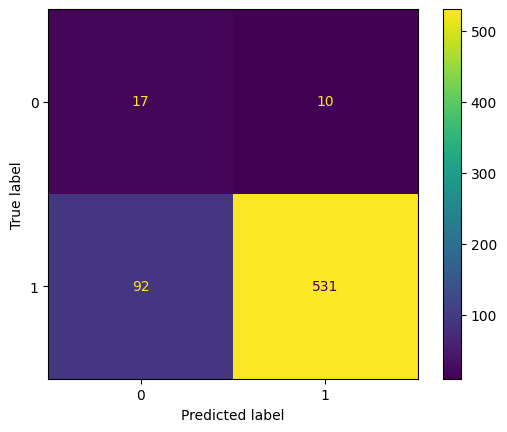

In [59]:
ConfusionMatrixDisplay(cm).plot();

The chemical build up of wines does not seem to be that great for differentiating between fraudulent wines and real wines. 

---